# Support Vector Machine (SVM)

## Linear SVM Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn import svm

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col=['petal_length', 'petal_width']
X = df.loc[:, col]

In [4]:
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [5]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
# clf = svm.LinearSVC(C=C, loss='hinge')
# clf = svm.SVC(kernel='poly', degree=3, C=C)
# clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
clf.predict([[6, 2]])

array([2], dtype=int64)

In [7]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

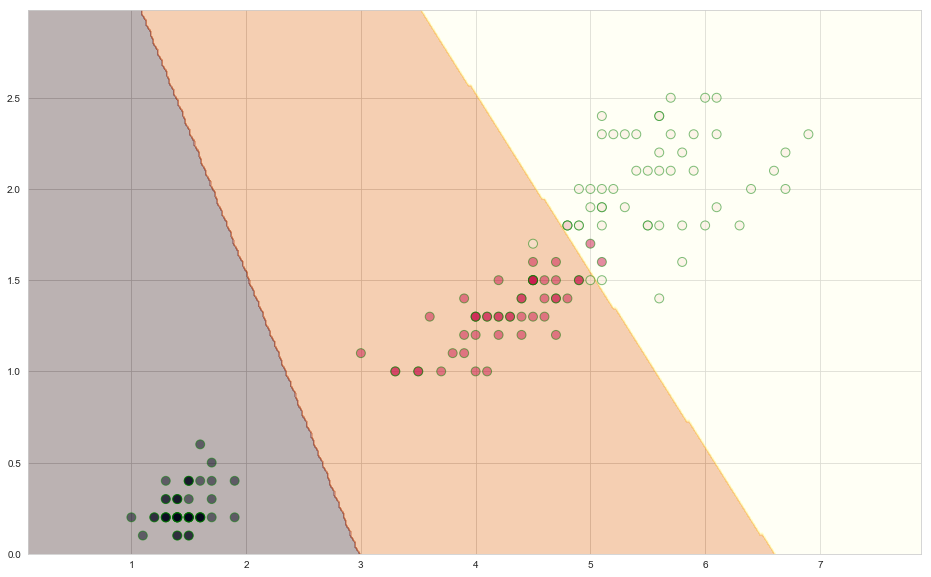

In [8]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:,0], X.values[:, 1], c=y, s=80, alpha=0.5, edgecolors='g')

# Linear SVM Implementation

In [9]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Scale Features

In [10]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [11]:
C = 1
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### Cross Validation Within Train Dataset

In [13]:
res = cross_val_score(clf, X_std_train, y_train, cv = 10, scoring='accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [14]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [15]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [16]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_train,
                                                          y_train_pred,
                                                          average='weighted')))
print('Recall Score: \t\t {0:.4f}'.format(recall_score(y_train,
                                                      y_train_pred,
                                                      average='weighted')))
print('F1 Score: \t\t {0:.4f}'.format(f1_score(y_train,
                                              y_train_pred,
                                              average='weighted')))

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


### Cross Validation Within Test Dataset

In [17]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [18]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [19]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test,
                                                          y_test_pred,
                                                          average='weighted')))
print('Recall Score: \t\t {0:.4f}'.format(recall_score(y_test,
                                                      y_test_pred,
                                                      average='weighted')))
print('F1 Score: \t\t {0:.4f}'.format(f1_score(y_test,
                                              y_test_pred,
                                              average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


***

# Polynomial Kernel

In [20]:
C = 1
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

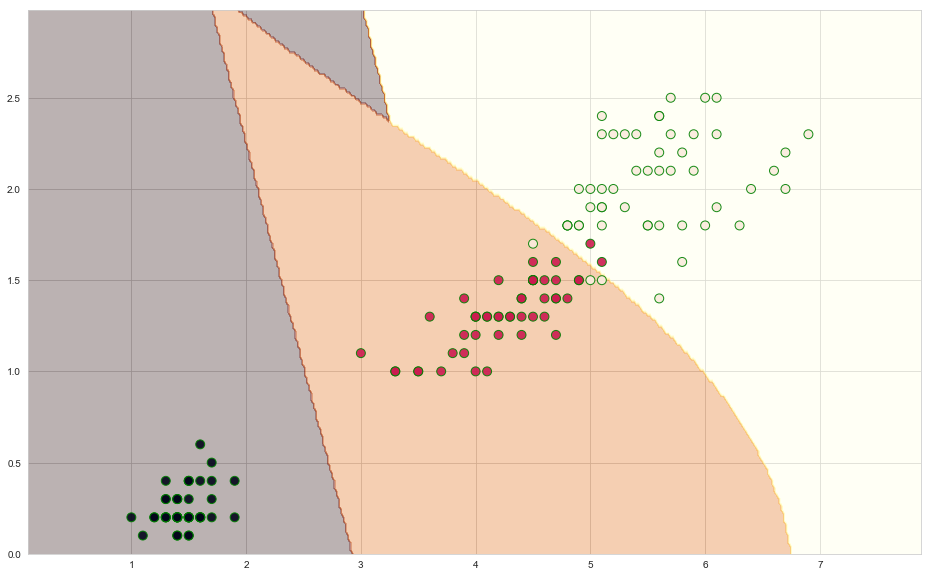

In [22]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

# Polynomial SVM Implementation

In [23]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0, 
                 'versicolor': 1, 
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Scale Features

In [24]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [25]:
C = 1
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Cross Validation Within Train Dataset

In [26]:
res = cross_val_score(clf, X_std_train, y_train, cv = 10, scoring='accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

Average Accuracy: 	 0.9524
Accuracy SD: 		 0.0712


In [27]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [28]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [29]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_train,
                                                          y_train_pred,
                                                          average='weighted')))
print('Recall Score: \t\t {0:.4f}'.format(recall_score(y_train,
                                                      y_train_pred,
                                                      average='weighted')))
print('F1 Score: \t\t {0:.4f}'.format(f1_score(y_train,
                                              y_train_pred,
                                              average='weighted')))

Precision Score: 	 0.9570
Recall Score: 		 0.9500
F1 Score: 		 0.9500


### Cross Validation With Test Dataset

In [30]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [31]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3,  3]], dtype=int64)

In [32]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test,
                                                          y_test_pred,
                                                          average='weighted')))
print('Recall Score: \t\t {0:.4f}'.format(recall_score(y_test,
                                                      y_test_pred,
                                                      average='weighted')))
print('F1 Score: \t\t {0:.4f}'.format(f1_score(y_test,
                                              y_test_pred,
                                              average='weighted')))

Precision Score: 	 0.9187
Recall Score: 		 0.9000
F1 Score: 		 0.8885


# Gaussian Radial Basis Function (rbf)

In [33]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0, 
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, t_test = train_test_split(X, y, train_size = 0.8, random_state=0)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Scale Features

In [34]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [35]:
C = 1
clf = svm.SVC(kernel='rbf', C=C, gamma=0.7)
clf.fit(X_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Cross Validation Within Train Datasets

In [36]:
res = cross_val_score(clf, X_std_train, y_train, cv = 10, scoring='accuracy')
print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [37]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [38]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [39]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_train,
                                                          y_train_pred,
                                                          average='weighted')))
print('Recall Score: \t\t {0:.4f}'.format(recall_score(y_train,
                                                      y_train_pred,
                                                      average='weighted')))
print('F1 Score: \t\t {0:.4f}'.format(f1_score(y_train,
                                              y_train_pred,
                                              average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


### Cross Validation With Test Dataset

In [40]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [41]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [42]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test,
                                                          y_test_pred,
                                                          average='weighted')))
print('Recall Score: \t\t {0:.4f}'.format(recall_score(y_test,
                                                      y_test_pred,
                                                      average='weighted')))
print('F1 Score: \t\t {0:.4f}'.format(f1_score(y_test,
                                              y_test_pred,
                                              average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


### Grid Search

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [44]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [45]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20),
         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [46]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring='accuracy')

In [47]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    5.6s finished
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [48]:
svm_grid_rbf.best_score_

0.9583333333333334

In [49]:
best = svm_grid_rbf.best_estimator_.get_params()

In [50]:
best

{'memory': None,
 'steps': [('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))],
 'clf': SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 0.1,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 0.25,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [51]:
for k in sorted(params.keys()):
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 0.10
	clf__gamma: 	 0.25


### Conducting Validation In The Test Dataset

In [52]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [53]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [54]:
print('Precision Score: \t {0:.4f}'.format(precision_score(y_test,
                                                          y_test_pred,
                                                          average='weighted')))
print('Recall Score: \t\t {0:.4f}'.format(recall_score(y_test,
                                                      y_test_pred,
                                                      average='weighted')))
print('F1 Score: \t\t {0:.4f}'.format(f1_score(y_test,
                                              y_test_pred,
                                              average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


In [55]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, m_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, tt = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

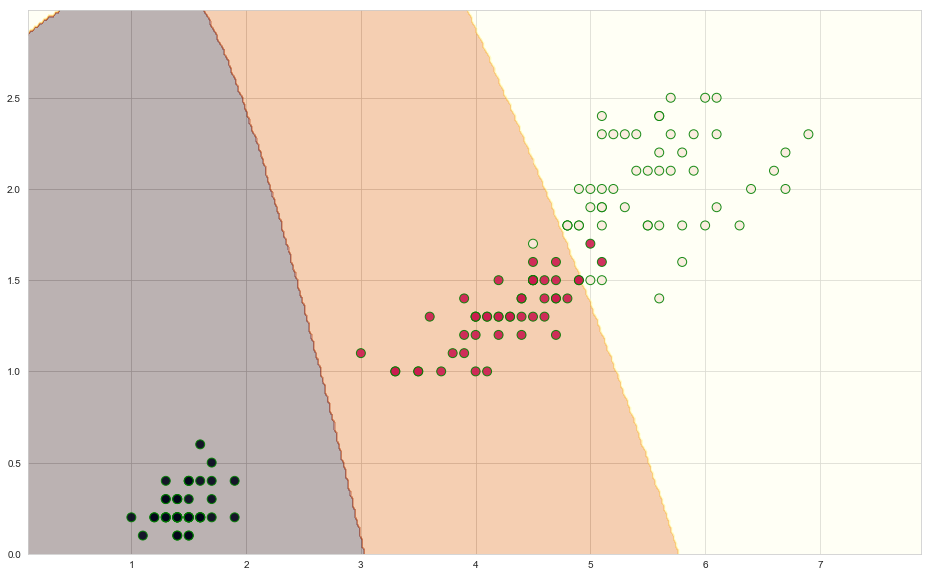

In [56]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

***

# Support Vector Regression

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style('whitegrid')
%matplotlib inline

In [58]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
y = boston_data.target
X = df[['LSTAT']].values

In [60]:
svr = SVR(gamma='auto')
svr.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

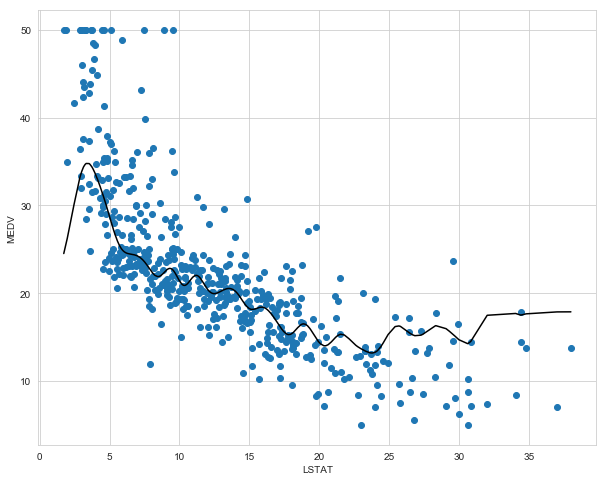

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Kernel

In [64]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
y_train_pred = svr.predict(X_train)

In [66]:
y_test_pred = svr.predict(X_test)

In [67]:
print("MSE train: {0:.4f}, test:{1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 41.8187, test:36.8372


In [68]:
print("R^2 train: {0:.4f}, test:{1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2 train: 0.5242, test:0.5056


### Polynomial

In [69]:
svr = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [70]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [71]:
print("MSE train: {0:.4f}, test:{1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 110.3334, test:114.3676


In [72]:
print("R^2 train: {0:.4f}, test:{1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2 train: -0.2553, test:-0.5349


### RBF Kernel

In [73]:
svr = SVR(kernel='rbf', C=1, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [75]:
print("MSE train: {0:.4f}, test:{1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))

MSE train: 32.3633, test:29.7030


In [76]:
print("R^2 train: {0:.4f}, test:{1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

R^2 train: 0.6318, test:0.6014


***

# Scaling Data First

In [78]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

# from sklearn import preprocessing
# X_scaled = 

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.3, random_state=42)

### Linear Kernel

In [80]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [82]:
print("MSE train: {0:.4f}, test:{1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test:{1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

MSE train: 0.4905, test:0.4342
R^2 train: 0.5289, test:0.5080


### Polynomial

In [83]:
svr = SVR(kernel='poly', C=1e3, degree=2, gamma='auto')
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [84]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [85]:
print("MSE train: {0:.4f}, test:{1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test:{1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

MSE train: 1.0593, test:0.8535
R^2 train: -0.0174, test:0.0330


### RBF

In [86]:
svr = SVR(kernel='rbf', C=1, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [88]:
print("MSE train: {0:.4f}, test:{1:.4f}".\
     format(mean_squared_error(y_train, y_train_pred),
           mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test:{1:.4f}".\
     format(r2_score(y_train, y_train_pred),
           r2_score(y_test, y_test_pred)))

MSE train: 0.3922, test:0.3680
R^2 train: 0.6233, test:0.5831
